In [2]:

import numpy as np
import yfinance as yf
import pandas_datareader as pdr
from pandas_datareader import data, wb
from pandas_datareader.yahoo.options import Options
from pandas_datareader.yahoo.daily import YahooDailyReader
import seaborn as sns
import pandas as pd
sns.set_style('whitegrid')
import plotly.graph_objects as go

In [3]:
import plotly.express as px
from plotly.subplots import make_subplots 

In [4]:
import matplotlib.pyplot as plt

In [5]:
from datetime import datetime

In [7]:
#Setting end time to current date an end start time a year ago 

end = datetime.now()

#change the start date using numerals such as -1 or -2 for start date 2 years ago from current date
start = datetime(end.year-1,end.month,end.day)

In [8]:
#Creating list of different stocks based on sector 

tech_list=["AAPL","GOOG","AMZN","MSFT","QQQ","SPY"]
semi_list=["INTC","NVDA","AMD","AVGO","TSM","ASML","AMAT","MU","QCOM","TXN","SPY"]
payment_list=["VMW", "CDNS" ,"DDOG", "CRWD", "SNPS","SNOW","SPY"]

In [9]:
index_list = ["SPY","QQQ","DX=F"]

In [11]:
#using for loop with publiic function to donwload stock data in the list 

for stock in tech_list:   
    globals()[stock] = pdr.get_data_yahoo(stock,start,end)    

for semi in semi_list:
    globals()[semi]=pdr.get_data_yahoo(semi,start,end)
    
for pay in payment_list:
    globals()[pay]=pdr.get_data_yahoo(semi,start,end)

for index in index_list:
    globals()[index] = pdr.get_data_yahoo(index,start,end)

<AxesSubplot:xlabel='Date'>

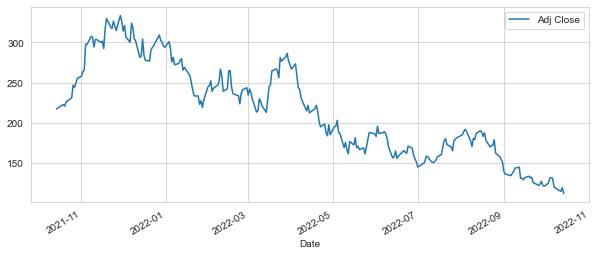

In [12]:
#plotting the Adj close column for the selected stock

NVDA['Adj Close'].plot(legend=True,figsize=(10,4))

<AxesSubplot:xlabel='Date'>

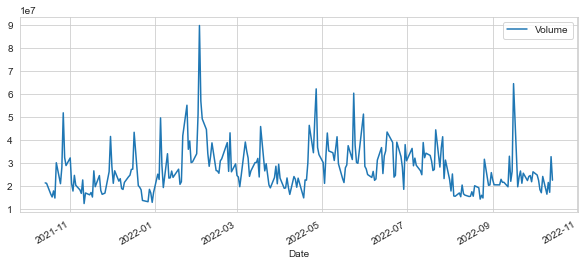

In [13]:
#plotting the volume column for the selected stock 

GOOG['Volume'].plot(legend=True,figsize=(10,4))

In [14]:
#creating a list for different Moving average days. Add the MA days in the list for more days

ma_day = [10,20,50]

for ma in ma_day:
    #creating sepereate column for different MA days 
    column_name = "MA for %s days"  %(str(ma))
    
    #plotting the Adj close column with MA columns using rolling window method 
    AMZN[column_name]= pd.Series(AMZN['Adj Close']).rolling(window=ma).mean()

<AxesSubplot:xlabel='Date'>

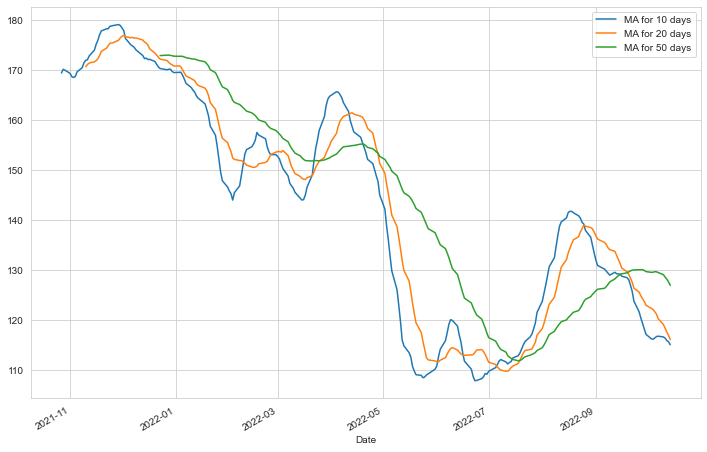

In [15]:
AMZN[['MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(12,8))

In [16]:
#Calculating Z score of the ticker

def z_score(chunk):
    return (chunk[-1] - chunk.mean()) / chunk.std()
#Creating a new DF for the Z score  
SPY_Z_score = SPY.Close.rolling(window=30).apply(z_score)



In [17]:
#displaying result as series
SPY_Z_score

Date
2021-10-14         NaN
2021-10-15         NaN
2021-10-18         NaN
2021-10-19         NaN
2021-10-20         NaN
                ...   
2022-10-10   -1.470024
2022-10-11   -1.503087
2022-10-12   -1.462744
2022-10-13   -0.814996
2022-10-14   -1.251208
Name: Close, Length: 253, dtype: float64

In [18]:
#Converting Result into DataFrame from series 
spy_z = pd.DataFrame(SPY_Z_score)

In [19]:
#displaying results as DataFrame
z_score 

Close
Date                
2021-10-14       NaN
2021-10-15       NaN
2021-10-18       NaN
2021-10-19       NaN
2021-10-20       NaN
...              ...
2022-10-10 -1.470024
2022-10-11 -1.503087
2022-10-12 -1.462744
2022-10-13 -0.814996
2022-10-14 -1.251208

[253 rows x 1 columns]

In [21]:
#Creating subplots 3 rows and 1 column
fig = make_subplots(rows=3, cols=1,row_heights=[0.7,0.15,0.15])
fig.append_trace(
    go.Candlestick(
        x=SPY.index,
        open=SPY['Open'],
        high=SPY['High'],
        low=SPY['Low'],
        close=SPY['Adj Close'],
        name="Candstick"),
    row=1, 
    col=1,)
                  
fig.append_trace(go.Scatter(x=SPY.index, y=SPY['Volume'],name="Volume"),row=2, col=1)
fig.append_trace(go.Scatter(x=z_score.index,y=z_score['Close'],name="Z score"),row=3, col=1)
fig.update_layout(
        font_family="Arial",
        font_color="grey",
        title_font_family="Times New Roman",
        title_font_color="red",
        legend_title_font_color="green",
        xaxis_rangeslider_visible=False,
        title={
                'text':"AMZN",
                'x':0.5,
                'y':0.9,
                'xanchor': 'center',
                'yanchor': 'top',
                'font_family':"Arial",
                'font_color':"grey"
    }
    
)                        
fig.show()


In [22]:
'''' go.Scatter(x=AMZN.index, y=AMZN['MA for 10 days'],name="10 MA", line=dict(color='orange', width=1)),
                go.Scatter(x=AMZN.index, y=AMZN['MA for 20 days'],name="20 MA", line=dict(color='red', width=1)),      
                go.Scatter(x=AMZN.index, y=AMZN['MA for 50 days'],name="50 MA", line=dict(color='blue', width=1)))'''

'\' go.Scatter(x=AMZN.index, y=AMZN[\'MA for 10 days\'],name="10 MA", line=dict(color=\'orange\', width=1)),\n                go.Scatter(x=AMZN.index, y=AMZN[\'MA for 20 days\'],name="20 MA", line=dict(color=\'red\', width=1)),      \n                go.Scatter(x=AMZN.index, y=AMZN[\'MA for 50 days\'],name="50 MA", line=dict(color=\'blue\', width=1)))'

<AxesSubplot:xlabel='Date'>

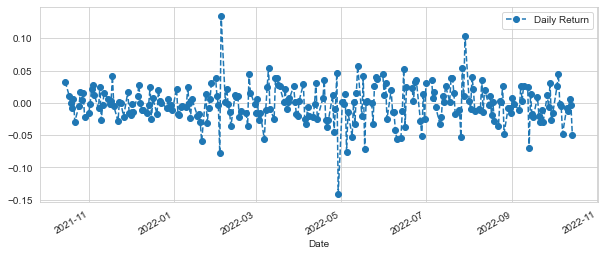

In [23]:
AMZN['Daily Return']= AMZN['Adj Close'].pct_change()
AMZN['Daily Return'].plot(figsize=(10,4),linestyle='--',marker='o',legend=True)

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='Daily Return', ylabel='Density'>

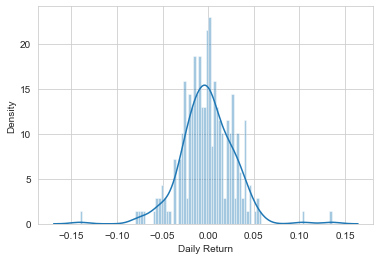

In [24]:
 sns.distplot(AMZN['Daily Return'].dropna(),bins=100)


In [25]:
Closing_df=pdr.get_data_yahoo(tech_list,start,end)['Adj Close']


In [26]:
Closing_semi_df=pdr.get_data_yahoo(semi_list,start,end)['Adj Close']

In [27]:
closing_index_df=pdr.get_data_yahoo(index_list,start,end)['Adj Close']

In [28]:
Closing_df.head()

Symbols           AAPL        GOOG        AMZN        MSFT         QQQ  \
Date                                                                     
2021-10-14  142.958923  141.412003  164.992996  300.235504  364.353790   
2021-10-15  144.032913  141.675003  170.451004  301.683380  366.649445   
2021-10-18  145.733383  142.960495  172.337006  304.737823  370.336395   
2021-10-19  147.931046  143.822006  172.207504  305.670013  373.138947   
2021-10-20  148.428268  142.414993  170.753006  304.856812  372.651917   

Symbols            SPY  
Date                    
2021-10-14  435.903900  
2021-10-15  439.223663  
2021-10-18  440.523987  
2021-10-19  443.922577  
2021-10-20  445.666168

In [29]:
semi_rets = Closing_semi_df.pct_change()

In [30]:
tech_rets = Closing_df.pct_change()

In [31]:
index_rets = closing_index_df.pct_change()

In [32]:
Closing_payment_df=pdr.get_data_yahoo(payment_list,start,end)['Adj Close']

In [33]:
payment_rets = Closing_payment_df.pct_change()

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



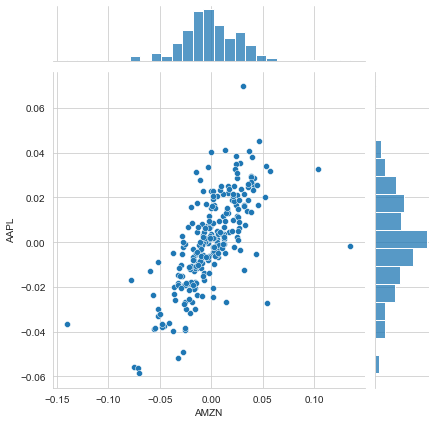

In [34]:
sns.jointplot('AMZN','AAPL',tech_rets,kind='scatter')

In [35]:
Closing_semi_df.head()

Symbols          INTC        NVDA         AMD        AVGO         TSM  \
Date                                                                    
2021-10-14  52.179684  217.285828  111.989998  483.027740  110.349655   
2021-10-15  52.721802  218.444901  112.120003  488.512299  112.604500   
2021-10-18  52.731491  222.042007  116.430000  488.619049  113.075058   
2021-10-19  53.447868  222.721466  116.330002  495.443176  114.663254   
2021-10-20  53.602760  220.852966  116.389999  494.472473  113.320152   

Symbols           ASML        AMAT         MU        QCOM         TXN  \
Date                                                                    
2021-10-14  768.729858  130.963867  67.361069  126.266052  187.534424   
2021-10-15  779.703430  130.487900  67.241844  127.777397  189.443954   
2021-10-18  778.537842  132.163757  66.824570  127.698883  189.892136   
2021-10-19  791.121460  133.472702  67.132561  130.034607  193.126648   
2021-10-20  758.269897  132.857880  67.828026  129.700943  194.247070   

Symbols            SPY  
Date                    
2021-10-14  435.903870  
2021-10-15  439.223633  
2021-10-18  440.523987  
2021-10-19  443.922577  
2021-10-20  445.666168

In [36]:
Closing_payment_df

Symbols            VMW        CDNS        DDOG        CRWD        SNPS  \
Date                                                                     
2021-10-14  124.976173  157.330002  153.360001  276.010010  304.829987   
2021-10-15  128.281860  155.779999  154.479996  273.109985  306.260010   
2021-10-18  129.093933  157.539993  157.419998  285.350006  307.220001   
2021-10-19  132.727707  158.830002  157.940002  282.350006  311.000000   
2021-10-20  133.900711  160.089996  158.850006  283.329987  315.500000   
...                ...         ...         ...         ...         ...   
2022-10-10  107.059998  154.710007   84.019997  161.080002  292.980011   
2022-10-11  105.769997  148.039993   82.720001  155.789993  277.339996   
2022-10-12  105.949997  147.970001   82.349998  152.990005  276.190002   
2022-10-13  106.599998  150.550003   80.900002  152.600006  287.429993   
2022-10-14  106.169998  147.449997   75.690002  145.979996  277.609985   

Symbols           SNOW         SPY  
Date                                
2021-10-14  332.119995  435.903870  
2021-10-15  333.570007  439.223633  
2021-10-18  337.880005  440.523956  
2021-10-19  339.739990  443.922577  
2021-10-20  334.130005  445.666138  
...                ...         ...  
2022-10-10  159.050003  360.019989  
2022-10-11  153.529999  357.739990  
2022-10-12  158.529999  356.559998  
2022-10-13  156.250000  365.970001  
2022-10-14  152.380005  357.630005  

[253 rows x 7 columns]

In [37]:
tech_rets

Symbols         AAPL      GOOG      AMZN      MSFT       QQQ       SPY
Date                                                                  
2021-10-14       NaN       NaN       NaN       NaN       NaN       NaN
2021-10-15  0.007513  0.001860  0.033080  0.004822  0.006301  0.007616
2021-10-18  0.011806  0.009074  0.011065  0.010125  0.010056  0.002961
2021-10-19  0.015080  0.006026 -0.000751  0.003059  0.007568  0.007715
2021-10-20  0.003361 -0.009783 -0.008446 -0.002660 -0.001305  0.003928
...              ...       ...       ...       ...       ...       ...
2022-10-10  0.002356 -0.008637 -0.007769 -0.021303 -0.009996 -0.007635
2022-10-11 -0.010255 -0.006686 -0.012844 -0.016750 -0.013738 -0.006333
2022-10-12 -0.004605  0.002550  0.006149  0.001508 -0.000343 -0.003298
2022-10-13  0.033613  0.014344 -0.003277  0.037608  0.023452  0.026391
2022-10-14 -0.032240 -0.025374 -0.050031 -0.024249 -0.030057 -0.022789

[253 rows x 6 columns]

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

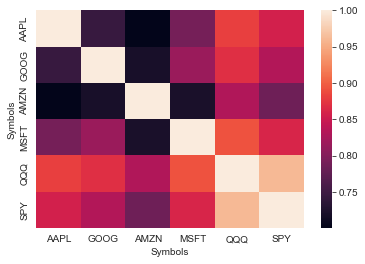

In [38]:

sns.heatmap(data = tech_rets.corr())
            

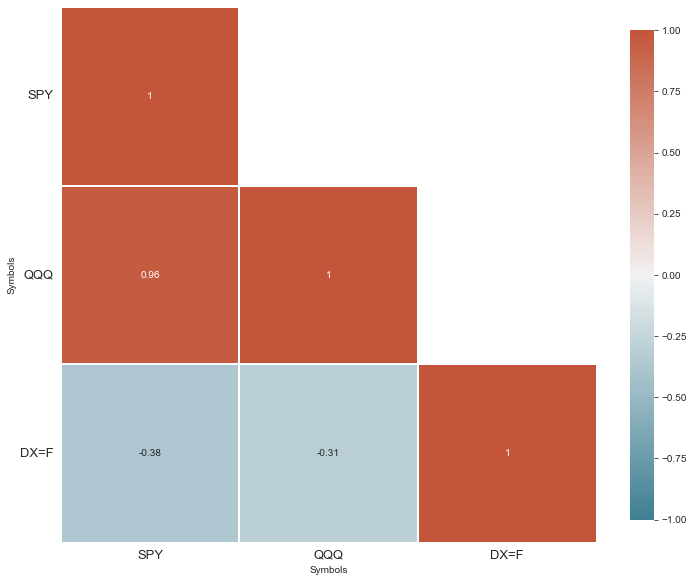

In [39]:
plt.figure(figsize = (12,12)) #adjust size of the heatmap
mask = np.triu(np.ones_like(index_rets.corr(), dtype=bool)) #create a mask to remove redundant matrix
np.fill_diagonal(mask, False)  # keeps the diagonal

annot_kws={
                'fontsize': 16,
                'fontweight': 'light',      #Adjust font of the annotation
                'fontfamily': 'Arial'
            }
cmap = sns.diverging_palette(220, 20, as_cmap=True) # Define a color map for our heatmap
sns.heatmap(
        data=index_rets.corr(),  # correlation matrix
        mask=mask, # remove upper right of the matrix
        linewidths=0.3,  # the width of lines separating the matrix squares
        square=True,   # enforce 1:1 ratios among correlation cells
        cmap=cmap,  # use the color map we defined above
        vmax=1,  # define the max of our correlation scale
        vmin=-1, # define the min of our correlation scale
        center=0,  # The value at which the color map is centered about (white)
        cbar_kws={"shrink": .75},  # shrink the scale a bit
        annot=True, #add annotation on the heatmap
        #annot_kws = annot_kws #change font size of annotations
    )
# adjust y-axis ticks for legibility
plt.yticks(rotation=0,fontsize=13)  
# adjust x-axis ticks for legibility
plt.xticks(rotation=0,fontsize=13) 
# show the heatmap
plt.show()


In [40]:
'''
returns_fig =sns.PairGrid(semi_rets.dropna())
returns_fig.map_upper(plt.scatter)
returns_fig.map_lower(sns.kdeplot, cmap='cool_d')
returns_fig.map_diag(plt.hist,bins=30)
'''

"\nreturns_fig =sns.PairGrid(semi_rets.dropna())\nreturns_fig.map_upper(plt.scatter)\nreturns_fig.map_lower(sns.kdeplot, cmap='cool_d')\nreturns_fig.map_diag(plt.hist,bins=30)\n"

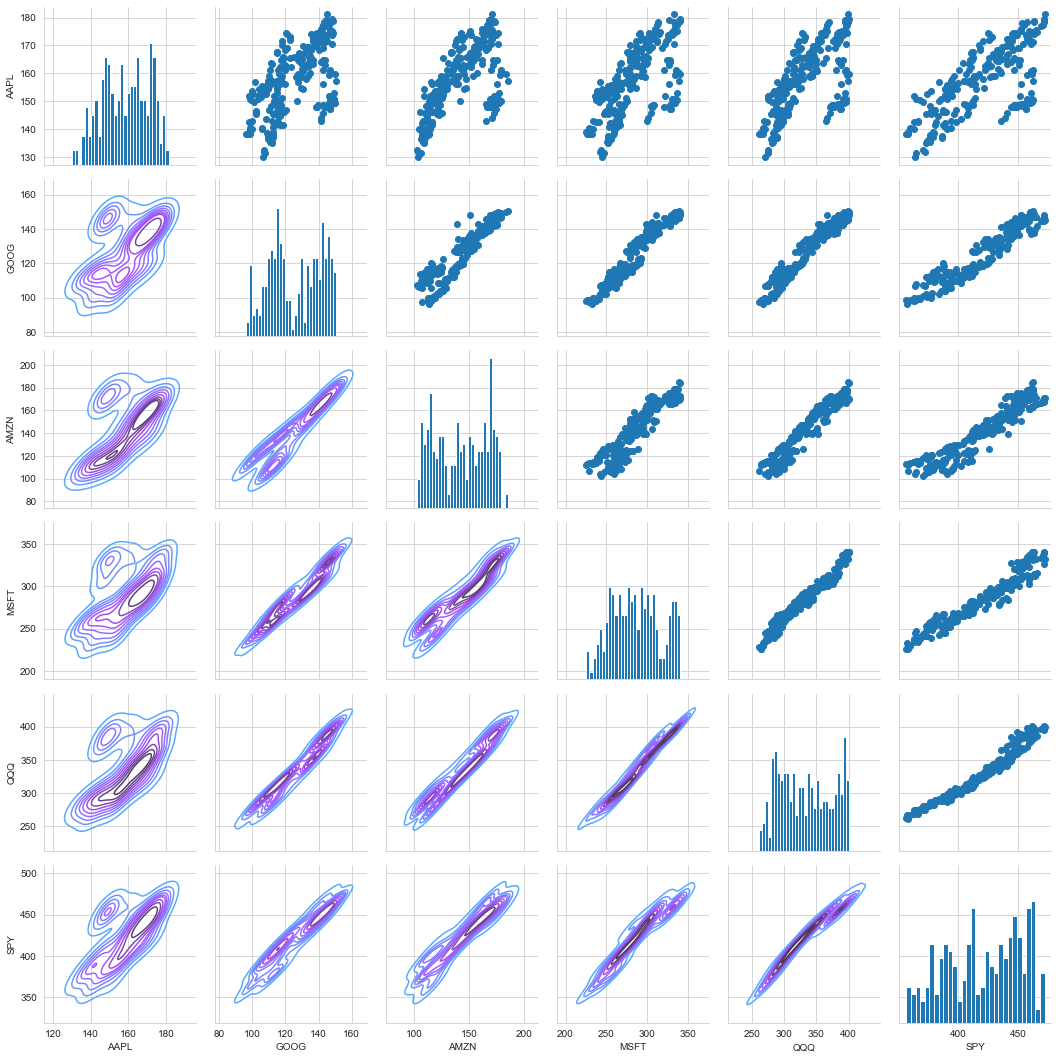

In [41]:
returns_fig =sns.PairGrid(Closing_df)
returns_fig.map_upper(plt.scatter)
returns_fig.map_lower(sns.kdeplot, cmap='cool_d')
returns_fig.map_diag(plt.hist,bins=30)   

In [42]:
Semirets= semi_rets.dropna()

In [43]:
rets = tech_rets.dropna()

In [44]:
paymentrets = payment_rets.dropna()

In [45]:
paymentrets

Symbols          VMW      CDNS      DDOG      CRWD      SNPS      SNOW  \
Date                                                                     
2021-10-15  0.026451 -0.009852  0.007303 -0.010507  0.004691  0.004366   
2021-10-18  0.006330  0.011298  0.019032  0.044817  0.003135  0.012921   
2021-10-19  0.028148  0.008188  0.003303 -0.010513  0.012304  0.005505   
2021-10-20  0.008838  0.007933  0.005762  0.003471  0.014469 -0.016513   
2021-10-21  0.008944  0.033481  0.013031  0.002718  0.017464  0.023703   
...              ...       ...       ...       ...       ...       ...   
2022-10-10 -0.025043 -0.026369 -0.045878 -0.062835 -0.045699 -0.091662   
2022-10-11 -0.012049 -0.043113 -0.015472 -0.032841 -0.053383 -0.034706   
2022-10-12  0.001702 -0.000473 -0.004473 -0.017973 -0.004147  0.032567   
2022-10-13  0.006135  0.017436 -0.017608 -0.002549  0.040697 -0.014382   
2022-10-14 -0.004034 -0.020591 -0.064400 -0.043381 -0.034165 -0.024768   

Symbols          SPY  
Date                  
2021-10-15  0.007616  
2021-10-18  0.002961  
2021-10-19  0.007715  
2021-10-20  0.003928  
2021-10-21  0.002608  
...              ...  
2022-10-10 -0.007635  
2022-10-11 -0.006333  
2022-10-12 -0.003298  
2022-10-13  0.026391  
2022-10-14 -0.022789  

[252 rows x 7 columns]

In [46]:
semi_rets

Symbols         INTC      NVDA       AMD      AVGO       TSM      ASML  \
Date                                                                     
2021-10-14       NaN       NaN       NaN       NaN       NaN       NaN   
2021-10-15  0.010389  0.005334  0.001161  0.011355  0.020434  0.014275   
2021-10-18  0.000184  0.016467  0.038441  0.000219  0.004179 -0.001495   
2021-10-19  0.013585  0.003060 -0.000859  0.013966  0.014046  0.016163   
2021-10-20  0.002898 -0.008389  0.000516 -0.001959 -0.011713 -0.041525   
...              ...       ...       ...       ...       ...       ...   
2022-10-10 -0.020218 -0.033620 -0.010780 -0.049470 -0.033118 -0.028485   
2022-10-11 -0.006349 -0.007198 -0.003114 -0.015856 -0.059164 -0.052929   
2022-10-12  0.011581 -0.007423  0.003817 -0.000441  0.010402 -0.003078   
2022-10-13  0.043032  0.040000  0.018842  0.017187  0.039151  0.017749   
2022-10-14 -0.019304 -0.061288 -0.050899 -0.024819 -0.040528 -0.064800   

Symbols         AMAT        MU      QCOM       TXN       SPY  
Date                                                          
2021-10-14       NaN       NaN       NaN       NaN       NaN  
2021-10-15 -0.003634 -0.001770  0.011970  0.010182  0.007616  
2021-10-18  0.012843 -0.006206 -0.000614  0.002366  0.002961  
2021-10-19  0.009904  0.004609  0.018291  0.017033  0.007715  
2021-10-20 -0.004606  0.010360 -0.002566  0.005801  0.003928  
...              ...       ...       ...       ...       ...  
2022-10-10 -0.041283 -0.028917 -0.052188 -0.015633 -0.007635  
2022-10-11 -0.036494  0.045348 -0.039878 -0.021302 -0.006333  
2022-10-12 -0.003801 -0.017874 -0.012633 -0.012382 -0.003298  
2022-10-13  0.044862  0.040000  0.038844  0.018410  0.026391  
2022-10-14 -0.057920 -0.039008 -0.025784 -0.038875 -0.022789  

[253 rows x 11 columns]

In [47]:
#fig = px.scatter(semi_rets.amd, x="total_bill", y="tip", facet_col="smoker", color="sex", trendline="ols")

In [53]:
area = np.pi*20



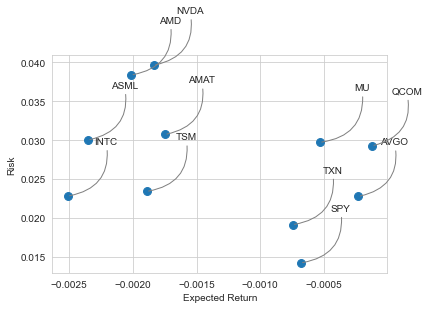

In [54]:
plt.scatter(semi_rets.mean(),semi_rets.std(),s = area)

plt.xlabel('Expected Return')
plt.ylabel('Risk')
for label,x ,y in zip(semi_rets.columns,semi_rets.mean(),semi_rets.std()):
    plt.annotate(
    label,
    xy=(x,y),xytext= (50,50),
    textcoords= 'offset points', ha = 'right',va = 'bottom',
    arrowprops = dict(arrowstyle='-',connectionstyle='arc3,rad=-0.5',color="0.5"))




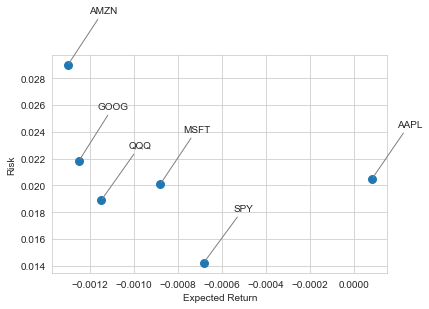

In [63]:
area = np.pi*20
 
plt.scatter(rets.mean(), rets.std(), s=area)
 
plt.xlabel('Expected Return')
plt.ylabel('Risk')
 
for label,x,y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label,
        xy=(x,y), xytext=(50,50),
        textcoords = 'offset points', ha='right', va='bottom',
        arrowprops = dict(arrowstyle='-', color="0.5",                          
                          connectionstyle='arc3,rad=0'))

In [64]:
tech_rets['GOOG'].quantile(0.05)

-0.036593299267317164

In [65]:
days = 365

dt = 1/days

mu = tech_rets.mean()['GOOG']

sigma = tech_rets.std()['GOOG']



In [66]:
def stock_monte_carlo(start_price,days,mu,sigma):
    price = np.zeros(days)
    price[0] = start_price
    
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in range(1,days):
        
        shock[x] = np.random.normal(loc=mu, scale=sigma)
        drift[x] = 0
        price[x] = price[x-1] + (price[x-1]*drift[x]+shock[x])
    return price

In [67]:
GOOG.head()

High         Low        Open       Close      Volume  \
Date                                                                     
2021-10-14  141.651505  139.339005  139.951996  141.412003  21426000.0   
2021-10-15  142.199997  141.064499  142.199997  141.675003  21250000.0   
2021-10-18  142.998749  141.213501  141.213501  142.960495  16564000.0   
2021-10-19  144.106995  143.095993  143.291504  143.822006  15316000.0   
2021-10-20  144.247757  141.912003  144.222504  142.414993  17940000.0   

             Adj Close  
Date                    
2021-10-14  141.412003  
2021-10-15  141.675003  
2021-10-18  142.960495  
2021-10-19  143.822006  
2021-10-20  142.414993

Text(0.5, 1.0, 'Monte Carlo Simulation')

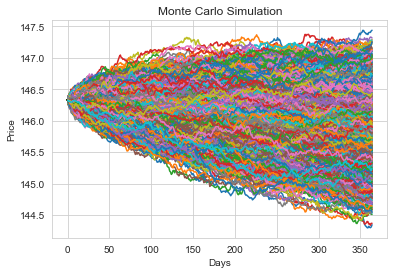

In [68]:
start_price = 146.324997
for run in range(10000):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
plt.xlabel("Days")
plt.ylabel("Price")
plt.title("Monte Carlo Simulation")

In [69]:
runs = 10000

simulations = np.zeros(runs)

for run in range(runs):
    simulations[run]  = stock_monte_carlo(start_price,days,mu,sigma)[days -1]

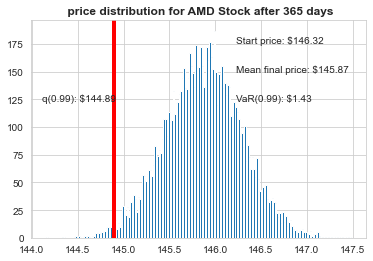

In [70]:
q = np.percentile(simulations,1)
plt.hist(simulations,bins =200)
# Starting Price
plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)
# Mean ending price
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))

# Display 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# Title
plt.title(u" price distribution for AMD Stock after %s days" % days, weight='bold');
